In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings


filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [15]:
# Read Data
df = pd.read_csv(r"wikipedia-nlp\wiki_data.csv", index_col=False)
df

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...
...,...,...
10854,10855,Soundcast\n\nSoundcast LLC is a privately fund...
10855,10856,Spectrum analyzer\n\nA spectrum analyzer measu...
10856,10857,Telepresence technology\n\nTelepresence techno...
10857,10858,Trans-Pacific Profiler Network\n\nThe Trans-Pa...


In [16]:
#We will use the first 2000 lines to avoid waiting for long transactions.
df = df[:2000]

In [8]:
df.shape

(2000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   text        2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [13]:
# Task 1: Write a function that will perform pre-processing operations on the text.

def clean_text(text):
    # Normalizing Case Folding
    text= text.str.lower()

    # Punctuations
    text = text.str.replace(r'[^\w\s]', ' ')
    text = text.str.replace("\n" , ' ')

    # Numbers
    text = text.str.replace('\d', ' ')
    return text

In [17]:
df['text'] = clean_text(df['text'])
df

,Unnamed: 0,text
0,1,anovo anovo (formerly a novo) is a computer s...
1,2,battery indicator a battery indicator (also k...
2,3,"bob pease robert allen pease (august 22, 1940..."
3,4,cavnet cavnet was a secure military forum whi...
4,5,clidar the clidar is a scientific instrument ...
...,...,...
1995,1996,edinburgh calotype club the edinburgh calotyp...
1996,1997,endrin endrin is an organochloride with the c...
1997,1998,ethylene glycol dinitrate ethylene glycol din...
1998,1999,forges de syam the forges de syam (syam forge...


In [18]:

# Task 2: Write a function that will remove unimportant words when extracting features in the text.

def remove_stopwords(text):
    stop_words = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))
    return text

df["text"] = remove_stopwords(df["text"])

In [19]:
# Task 3: Find less recurring words in the text.

pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]


in).             1
105mm            1
rml              1
60-pounder       1
"pounds"         1
                ..
styes            1
eyelids.         1
commoner         1
stye,            1
fluids/solids    1
Name: count, Length: 1000, dtype: int64

In [20]:
# Task 4: Remove less repetitive words from the text. (Hint: use the lambda function.)

sil = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [21]:
# Task 5: Tokenize the texts and observe the results.

df["text"].apply(lambda x: TextBlob(x).words)

0       [anovo, anovo, formerly, novo, computer, servi...
1       [battery, indicator, battery, indicator, also,...
2       [bob, pease, robert, allen, pease, august, 22,...
3       [cavnet, cavnet, secure, military, forum, beca...
4       [clidar, clidar, scientific, instrument, used,...
                              ...                        
1995    [edinburgh, calotype, club, edinburgh, calotyp...
1996    [endrin, endrin, organochloride, chemical, for...
1997    [ethylene, glycol, dinitrate, ethylene, glycol...
1998    [forges, de, syam, forges, de, syam, syam, for...
1999    [frank-kamenetskii, theory, combustion, frank-...
Name: text, Length: 2000, dtype: object

In [23]:
# Task 6: Perform the Lemmatization process.
# ran, runs, running -> run (normalization)

df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head()

,Unnamed: 0,text
0,1,anovo anovo (formerly novo) computer service c...
1,2,battery indicator battery indicator (also know...
2,3,"bob pea robert allen pea (august 22, 1940â â€“..."
3,4,cavnet cavnet secure military forum became ope...
4,5,clidar clidar scientific instrument used measu...


In [24]:
# Task 7: Calculate the frequencies of the terms in the text. (Hint: Required for barplot chart)

tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index() #will need to update the code

tf.head()

,index,0
0,anovo,2.00
1,company,1873.00
2,1.6,3.00
3,four,477.00
4,year,910.00


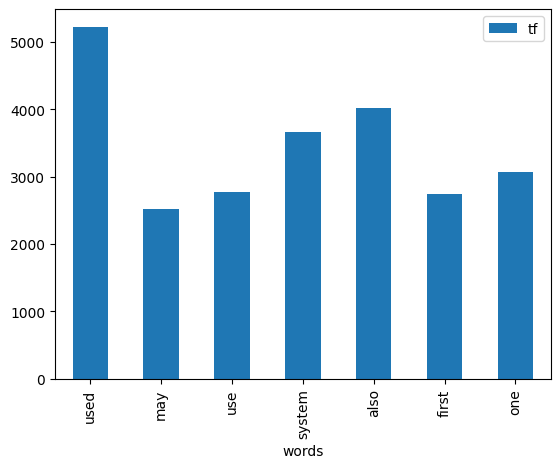

In [25]:
# Task 8: Create the barplot chart.

# Naming the columns
tf.columns = ["words", "tf"]
# Visualization of words with more than 5000 occurrences
tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()


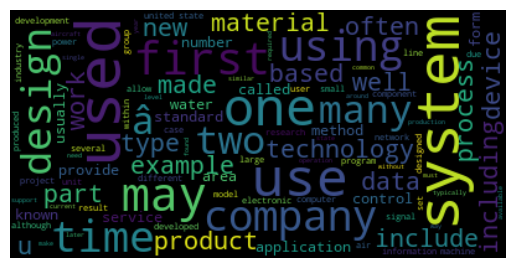

In [26]:
# Visualize words with WordCloud.

# we combined the words
text = " ".join(i for i in df["text"])

# we determine the properties of wordcloud visualization
wordcloud = WordCloud(max_font_size=50,
    max_words=100,
    background_color="black"
).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

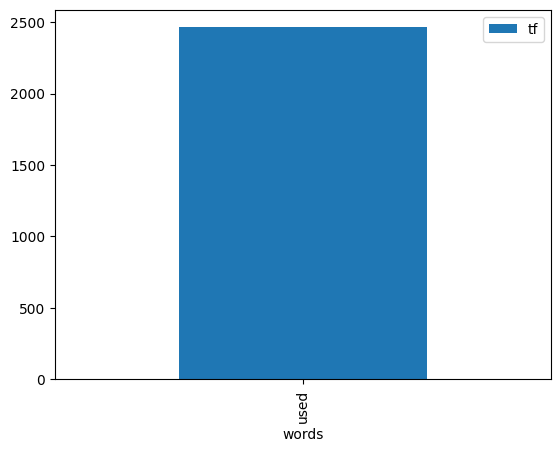

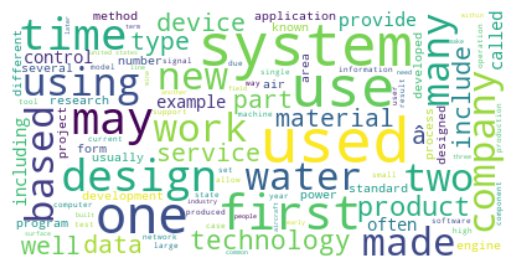

'anovoanovo (formerly novo) computer services company based beauvais, france. founded 1987, went public 1999, currently member cac small.it category \'service repair\' mobile news awards four years row, 2007 2010.as november 2017, score 1.6 10 trustpilot ratings site, 86% reviewers giving company lowest possible rating. battery indicatora battery indicator (also known battery gauge) device gives information battery. usually visual indication battery\'s state charge. particularly important case battery electric vehicle.some automobiles fitted battery condition meter monitor starter battery. meter is, essentially, voltmeter may also marked coloured zones easy visualization. many newer cars longer offer voltmeters ammeters; instead, vehicles typically light outline automotive battery it. somewhat misleading may confused indicator bad battery reality indicates problem vehicle\'s charging system. alternatively, ammeter may fitted. indicates whether battery charged discharged. adjacent pictu

In [2]:
# Task 9: Write all the stages as a single function.
# • Perform text preprocessing operations.
# • Add visualization operations as arguments to the function.
# • Write 'docstring' describing the function.

df = pd.read_csv(r"C:\Users\kezer\Projects\wikipedia-nlp\wiki_data.csv", index_col=0)


def wiki_preprocess(text, Barplot=False, Wordcloud=False):
    """
    Textler üzerinde ön işleme işlemleri yapar.

    :param text: DataFrame'deki textlerin olduğu değişken
    :param Barplot: Barplot görselleştirme
    :param Wordcloud: Wordcloud görselleştirme
    :return: text


    Example:
            wiki_preprocess(dataframe[col_name])

    """
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace("\n", '')
    # Numbers
    text = text.str.replace('\d', '')
    # Stopwords
    sw = stopwords.words('English')
    text = text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    # Rarewords / Custom Words
    sil = pd.Series(' '.join(text).split()).value_counts()[-1000:]
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sil))


    if Barplot:
        # Calculation of Term Frequencies
        tf = text.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        # Sütunların isimlendirilmesi
        tf.columns = ["words", "tf"]
        # Visualization of more than 5000 occurrences of words
        tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
        plt.show()

    if Wordcloud:
        # We combined the words
        text = " ".join(i for i in text)
        # wordcloud determines the features of the visualizationz
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="white").generate(text)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()

    return text

wiki_preprocess(df["text"][:1000])

wiki_preprocess(df["text"][:1000], True, True)